In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import mediapy as media
import numpy as np
from diffusers import DDIMScheduler
from data.src.local_sd_pipeline import LocalStableDiffusionPipeline


# try:
#     from optim_utils import *
# except ModuleNotFoundError:
#     import os; os.chdir("..")
#     from local_sd_pipeline import LocalStableDiffusionPipeline
#     from optim_utils import *

%load_ext autoreload
%autoreload 2

/home/ubuntu/miniforge3/envs/diffusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load model
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model_id = "CompVis/stable-diffusion-v1-4"

pipe = LocalStableDiffusionPipeline.from_pretrained(
    model_id,
    # torch_dtype=torch.bfloat16,
    safety_checker=None,
    requires_safety_checker=False,
)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

Loading pipeline components...:  17%|█▋        | 1/6 [00:00<00:00,  5.98it/s]/home/ubuntu/miniforge3/envs/diffusion/lib/python3.10/site-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
/home/ubuntu/miniforge3/envs/diffusion/lib/python3.10/site-packages/diffusers/models/lora.py:387: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 11.54it/s]


In [3]:
num_inference_steps = 50
guidance_scale = 7.5
num_images_per_prompt = 4
image_size = 512

In [22]:
prompt = "Björk Explains Decision To Pull <i>Vulnicura</i> From Spotify"
print(prompt)
seed = 0

Björk Explains Decision To Pull <i>Vulnicura</i> From Spotify


## Before Mitigation

  2%|▏         | 1/50 [00:00<00:26,  1.85it/s]

100%|██████████| 50/50 [00:27<00:00,  1.85it/s]


prompt: Björk Explains Decision To Pull <i>Vulnicura</i> From Spotify


,,,

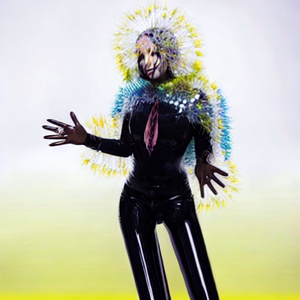
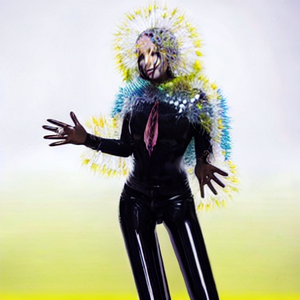
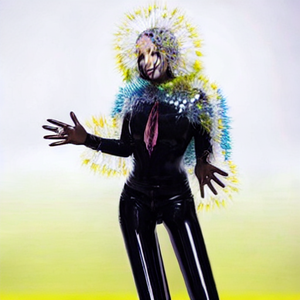
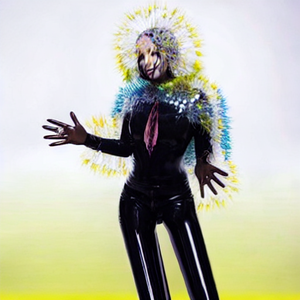

In [23]:
# set_random_seed(seed)

outputs, track_stats = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    track_noise_norm=True,
)
outputs = outputs.images

print(f"prompt: {prompt}")
media.show_images(outputs, width=300)

## After Mitigation

In [24]:
auged_prompt_embeds = pipe.aug_prompt(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    target_steps=[0],
    lr=0.05,
    optim_iters=10,
    target_loss=1,
    print_optim=True,
)

  0%|          | 0/50 [00:00<?, ?it/s]

step: 0, curr loss: 10.47200870513916
step: 1, curr loss: 3.591240882873535
step: 2, curr loss: 2.690150260925293
step: 3, curr loss: 1.7373991012573242
step: 4, curr loss: 1.4168453216552734
step: 5, curr loss: 1.331648826599121
step: 6, curr loss: 1.2539808750152588
step: 7, curr loss: 1.1661324501037598
step: 8, curr loss: 1.0694648027420044


  0%|          | 0/50 [00:12<?, ?it/s]

step: 9, curr loss: 0.9715926647186279


  2%|▏         | 1/50 [00:00<00:26,  1.85it/s]

100%|██████████| 50/50 [00:27<00:00,  1.85it/s]


prompt: Björk Explains Decision To Pull <i>Vulnicura</i> From Spotify


,,,

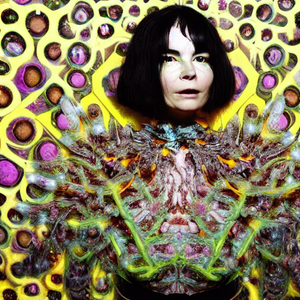
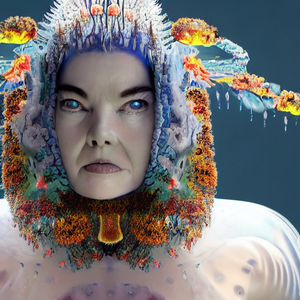
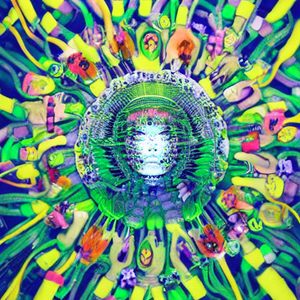
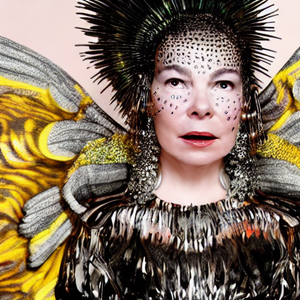

In [25]:
# set_random_seed(seed)

outputs, track_stats = pipe(
    prompt_embeds=auged_prompt_embeds,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    track_noise_norm=True,
    height=image_size,
    width=image_size,
)
outputs = outputs.images

print(f"prompt: {prompt}")
media.show_images(outputs, width=300)